# JOINT-FIT ANALYSIS

In [1]:
from vtspy import *

## Step 1. Load Fermi-LAT and VERITAS datasets

In [2]:
joint = JointAnalysis(veritas="analyzed", fermi="analyzed")

2022-06-24 11:25:23 INFO    : Initialize the joint-fit analysis...
2022-06-24 11:25:23 INFO    : Initialize the VERITAS analysis.
2022-06-24 11:25:23 INFO    : The setup is found [state_file = analyzed]. Read the state.
2022-06-24 11:25:23 INFO    : Completed (VERITAS initialization).
2022-06-24 11:25:23 INFO    : Initialize the Fermi-LAT analysis.
2022-06-24 11:25:28 INFO    : The setup and configuration is found [state_file = analyzed]. Loading the configuration...
2022-06-24 11:25:38 INFO    : The target, 4FGL J1221.3+3010, is associated with 2 source(s).
2022-06-24 11:25:38 INFO    : Completed (Fermi-LAT initialization).
2022-06-24 11:25:38 INFO    : Loading the Fermi-LAT events...
2022-06-24 11:25:39 INFO    : Loading the Fermi-LAT IRFs...
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
2022-06-24 11:25:39 WARNING : FITSFixedWarning: RADECSYS= 'FK5 ' 
the RADECSYS keyword is deprecated, use RADESYSa.
Set MJD-OBS to 58849.000000 from DATE-OBS.
Set MJD-END to 588

### Check datasets and models

In [3]:
joint.print_models()

model,type,name,value,unit,error,min,max,frozen,is_norm,link
str11,str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
1ES1218+304,spectral,index,3.1484e+00,,1.313e-01,nan,nan,False,False,
1ES1218+304,spectral,amplitude,4.2436e-12,cm-2 s-1 TeV-1,6.788e-13,nan,nan,False,True,
1ES1218+304,spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,
1ES1218+304,spatial,lon_0,1.8534e+02,deg,0.000e+00,nan,nan,True,False,
1ES1218+304,spatial,lat_0,3.0168e+01,deg,0.000e+00,-9.000e+01,9.000e+01,True,False,


### Check a global SED before the fit

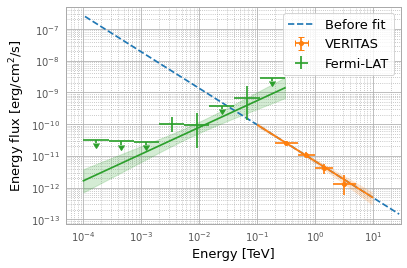

In [4]:
joint.plot_sed()

### Change a spectral model

2022-06-24 11:25:44 INFO    : The spectral model for the target is chaged:
2022-06-24 11:25:44 INFO    : PowerLawSpectralModel->LogParabolaSpectralModel


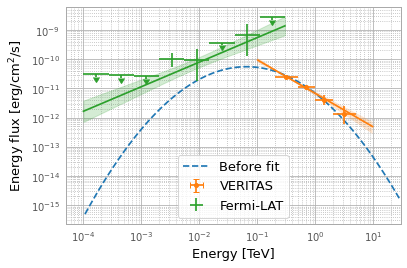

In [5]:
joint.change_model("logparabola", optimize=True, method="inst")
joint.plot("sed")

In [6]:
joint.print_models()

model,type,name,value,unit,error,min,max,frozen,is_norm,link
str11,str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
1ES1218+304,spectral,amplitude,4.2617e-12,cm-2 s-1 TeV-1,7.615e-13,nan,nan,False,True,
1ES1218+304,spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,
1ES1218+304,spectral,alpha,3.5385e+00,,3.332e-01,nan,nan,False,False,
1ES1218+304,spectral,beta,2.8214e-01,,1.984e-01,nan,nan,False,False,
1ES1218+304,spatial,lon_0,1.8534e+02,deg,0.000e+00,nan,nan,True,False,
1ES1218+304,spatial,lat_0,3.0168e+01,deg,0.000e+00,-9.000e+01,9.000e+01,True,False,


## Step 2. Run a joint-fit analysis

In [7]:
joint.fit()

2022-06-24 11:25:44 INFO    : Start fitting...
2022-06-24 11:35:04 INFO    : Fit successfully.


### Check a global SED after the fit

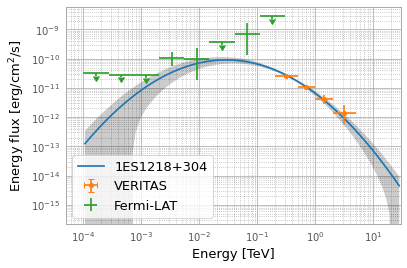

In [8]:
joint.plot("sed", show_flux_points=True)

In [9]:
joint.print_models()

model,type,name,value,unit,error,min,max,frozen,is_norm,link
str11,str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
1ES1218+304,spectral,amplitude,4.0987e-12,cm-2 s-1 TeV-1,7.240e-13,nan,nan,False,True,
1ES1218+304,spectral,reference,1.0000e+00,TeV,0.000e+00,nan,nan,True,False,
1ES1218+304,spectral,alpha,3.4837e+00,,1.847e-01,nan,nan,False,False,
1ES1218+304,spectral,beta,2.0962e-01,,3.391e-02,nan,nan,False,False,
1ES1218+304,spatial,lon_0,1.8534e+02,deg,0.000e+00,nan,nan,True,False,
1ES1218+304,spatial,lat_0,3.0168e+01,deg,0.000e+00,-9.000e+01,9.000e+01,True,False,


## Bonus. Test the 'agnpy' model

In [10]:
from vtspy.model import default_model

In [11]:
agnpy = default_model("agnpy", redshift=0.182)

### Check initial parameters

In [12]:
agnpy.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str15,float64,str4,int64,float64,float64,bool,bool,str1
spectral,norm_e,5.0000e-06,cm-3,0.000e+00,1.000e-20,1.000e+00,False,True,
spectral,p1,0.0000e+00,,0.000e+00,-2.000e+00,5.000e+00,False,False,
spectral,p2,3.0000e+00,,0.000e+00,-2.000e+00,5.000e+00,False,False,
spectral,log10_gamma_b,4.0000e+00,,0.000e+00,1.000e+00,7.000e+00,False,False,
spectral,log10_gamma_min,2.6990e+00,,0.000e+00,0.000e+00,4.000e+00,True,False,
spectral,log10_gamma_max,6.0000e+00,,0.000e+00,4.000e+00,8.000e+00,True,False,
spectral,delta_D,1.0000e+01,,0.000e+00,0.000e+00,6.000e+01,False,False,
spectral,log10_B,1.0000e+00,,0.000e+00,-4.000e+00,2.000e+00,False,False,
spectral,t_var,1.0000e+00,d,0.000e+00,1.000e+01,3.142e+07,True,False,


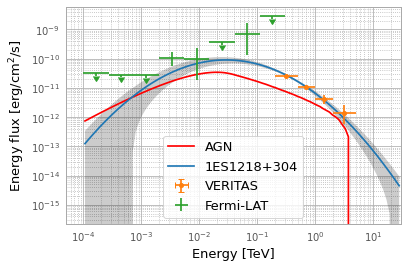

In [13]:
agnpy.plot([100 * u.MeV, 30 * u.TeV], sed_type="e2dnde", label="AGN", color="r")
joint.plot("sed", show_flux_points=True)

### Change a spectral model

2022-06-24 11:35:06 INFO    : A model, agnpy(SYN+SSC), is imported
2022-06-24 11:35:38 INFO    : The spectral model for the target is chaged:
2022-06-24 11:35:38 INFO    : LogParabolaSpectralModel->agnpy(SYN+SSC)


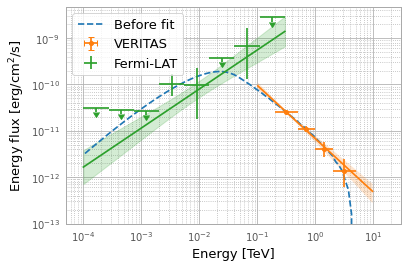

In [14]:
joint.change_model(agnpy, optimize=True, method="flux")
joint.plot("sed", show_flux_points=True)

In [15]:
joint.print_models()

model,type,name,value,unit,error,min,max,frozen,is_norm,link
str11,str8,str15,float64,str14,float64,float64,float64,bool,bool,str1
1ES1218+304,spectral,norm_e,5.7602e-06,cm-3,6.219e-07,1.000e-20,1.000e+00,False,True,
1ES1218+304,spectral,p1,2.2308e-01,,5.860e-01,-2.000e+00,5.000e+00,False,False,
1ES1218+304,spectral,p2,3.2369e+00,,7.854e-02,-2.000e+00,5.000e+00,False,False,
1ES1218+304,spectral,log10_gamma_b,4.0559e+00,,2.065e-02,1.000e+00,7.000e+00,False,False,
1ES1218+304,spectral,log10_gamma_min,2.6990e+00,,0.000e+00,0.000e+00,4.000e+00,True,False,
1ES1218+304,spectral,log10_gamma_max,6.0000e+00,,0.000e+00,4.000e+00,8.000e+00,True,False,
1ES1218+304,spectral,delta_D,1.0295e+01,,1.302e+00,0.000e+00,6.000e+01,False,False,
1ES1218+304,spectral,log10_B,1.2411e+00,,7.700e-02,-4.000e+00,2.000e+00,False,False,
1ES1218+304,spectral,t_var,1.0000e+00,d,0.000e+00,1.000e+01,3.142e+07,True,False,


### Fit the data

In [16]:
joint.fit()

2022-06-24 12:03:18 INFO    : Start fitting...
2022-06-24 12:56:19 INFO    : Fit successfully.


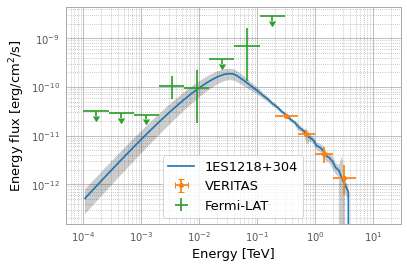

In [19]:
joint.plot("sed", show_flux_points=True)

In [20]:
joint.print_models()

model,type,name,value,unit,error,min,max,frozen,is_norm,link
str11,str8,str15,float64,str14,float64,float64,float64,bool,bool,str1
1ES1218+304,spectral,norm_e,4.8566e-06,cm-3,5.329e-06,1.000e-20,1.000e+00,False,True,
1ES1218+304,spectral,p1,-1.9420e+00,,1.581e+00,-2.000e+00,5.000e+00,False,False,
1ES1218+304,spectral,p2,3.1134e+00,,1.793e-01,-2.000e+00,5.000e+00,False,False,
1ES1218+304,spectral,log10_gamma_b,4.0534e+00,,5.281e-02,1.000e+00,7.000e+00,False,False,
1ES1218+304,spectral,log10_gamma_min,2.6990e+00,,0.000e+00,0.000e+00,4.000e+00,True,False,
1ES1218+304,spectral,log10_gamma_max,6.0000e+00,,0.000e+00,4.000e+00,8.000e+00,True,False,
1ES1218+304,spectral,delta_D,1.0111e+01,,2.442e-01,0.000e+00,6.000e+01,False,False,
1ES1218+304,spectral,log10_B,1.5034e+00,,7.587e-01,-4.000e+00,2.000e+00,False,False,
1ES1218+304,spectral,t_var,1.0000e+00,d,0.000e+00,1.000e+01,3.142e+07,True,False,
